# 초음파 광물 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리

In [3]:
df = pd.read_csv('sonar.csv', header = None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [5]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
# X data : scaling
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [8]:
# y_data : label encoding
# df 의 replace를 사용해서도 가능
from sklearn.preprocessing import LabelEncoder
y_labeld = LabelEncoder().fit_transform(df[60].values)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, y_labeld, stratify = y_labeld, test_size = 0.2, random_state = seed
)

In [10]:
X_train.shape

(166, 60)

## 모델 정의 및 설정

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model1 = Sequential([
    Dense(80, input_dim = 60, activation = 'relu'), 
    Dense(12, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                4880      
                                                                 
 dense_4 (Dense)             (None, 12)                972       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.compile('adam', 'binary_crossentropy',['accuracy'])

In [14]:
# fit
hist1 = model1.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 200, batch_size = 100, verbose = 0)

In [17]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.4291 - accuracy: 0.8333


[0.42907625436782837, 0.8333333134651184]

In [18]:
params1, acc1 = 5865, 0.833

### case2. 은닉층 4개

In [19]:
model2 = Sequential([
    Dense(80, input_dim = 60, activation = 'relu'),
    Dense(48, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                4880      
                                                                 
 dense_7 (Dense)             (None, 48)                3888      
                                                                 
 dense_8 (Dense)             (None, 20)                980       
                                                                 
 dense_9 (Dense)             (None, 8)                 168       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.compile('adam', 'binary_crossentropy',['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 200, batch_size = 100, verbose = 0)
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.7439 - accuracy: 0.8333


[0.7438634634017944, 0.8333333134651184]

In [21]:
prams2, acc2 = 9925, 0.8333

### case3. 은닉층 6개

In [27]:
model3 = Sequential([
    Dense(80, input_dim = 60, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(40, activation = 'relu'),
    Dense(22, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 80)                4880      
                                                                 
 dense_37 (Dense)            (None, 64)                5184      
                                                                 
 dense_38 (Dense)            (None, 40)                2600      
                                                                 
 dense_39 (Dense)            (None, 22)                902       
                                                                 
 dense_40 (Dense)            (None, 10)                230       
                                                                 
 dense_41 (Dense)            (None, 8)                 88        
                                                                 
 dense_42 (Dense)            (None, 1)                

In [23]:
model3.compile('adam', 'binary_crossentropy',['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 200, batch_size = 100, verbose = 0)
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.8505 - accuracy: 0.8095


[0.8505452275276184, 0.8095238208770752]

In [24]:
prams3, acc3 = 13947, 0.8333

### case4. 은닉층 8개

In [26]:
model4 = Sequential([
    Dense(80, input_dim = 60, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(40, activation = 'relu'),
    Dense(22, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 80)                4880      
                                                                 
 dense_28 (Dense)            (None, 64)                5184      
                                                                 
 dense_29 (Dense)            (None, 50)                3250      
                                                                 
 dense_30 (Dense)            (None, 40)                2040      
                                                                 
 dense_31 (Dense)            (None, 22)                902       
                                                                 
 dense_32 (Dense)            (None, 10)                230       
                                                                 
 dense_33 (Dense)            (None, 8)                

In [28]:
model4.compile('adam', 'binary_crossentropy',['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 200, batch_size = 100, verbose = 0)
model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.2874 - accuracy: 0.7619


[1.2873893976211548, 0.761904776096344]

In [30]:
prams4, acc4 = 16615, 0.7619

### 그래프 그려서 비교해보기 : 학습과정 시각화

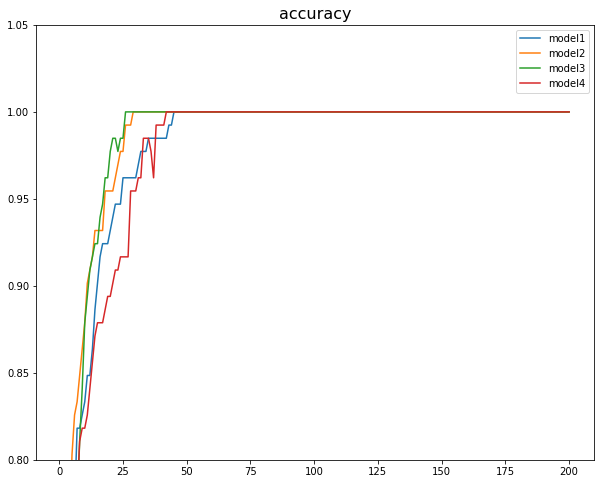

In [41]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
xs = np.arange(1, len(y_acc1) + 1)

plt.figure(figsize = (10, 8))
plt.plot(xs, y_acc1, label = 'model1')
plt.plot(xs, y_acc2, label = 'model2')
plt.plot(xs, y_acc3, label = 'model3')
plt.plot(xs, y_acc4, label = 'model4')
plt.ylim(0.8, 1.05)
plt.title('accuracy', fontsize = 16)

plt.legend()
plt.show()

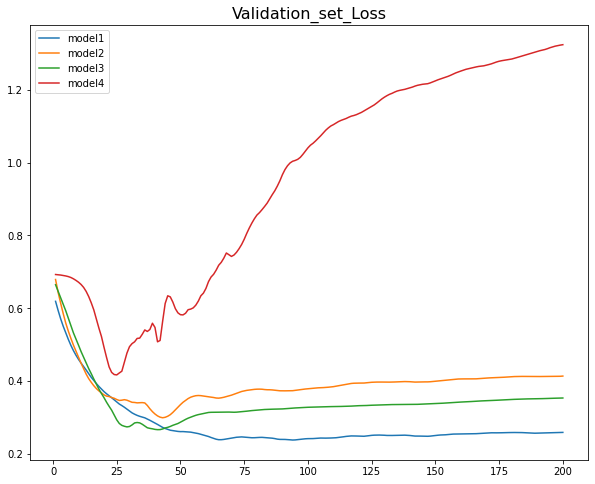

In [43]:
y_loss1 = hist1.history['val_loss']
y_loss2 = hist2.history['val_loss']
y_loss3 = hist3.history['val_loss']
y_loss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_loss1) + 1)

plt.figure(figsize = (10, 8))
plt.plot(xs, y_loss1, label = 'model1')
plt.plot(xs, y_loss2, label = 'model2')
plt.plot(xs, y_loss3, label = 'model3')
plt.plot(xs, y_loss4, label = 'model4')
plt.title('Validation_set_Loss', fontsize = 16)

plt.legend()
plt.show()
# 은닉층의 수가 많아질수록 Loss값이 기하급수적으로 커짐.

## case2에 대한 베스트모델

In [49]:
model = Sequential([
    Dense(80, input_dim = 60, activation = 'relu'),
    Dense(48, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 80)                4880      
                                                                 
 dense_49 (Dense)            (None, 48)                3888      
                                                                 
 dense_50 (Dense)            (None, 20)                980       
                                                                 
 dense_51 (Dense)            (None, 8)                 168       
                                                                 
 dense_52 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile('adam', 'binary_crossentropy',['accuracy'])

### 베스트 모델만 저장하는 콜백함수

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint

# save_best_only = True     : val_loss 가 이전보다 줄어들면 그것 만 저장
mc = ModelCheckpoint('sonar_best.h5', monitor = 'val_loss', 
                     verbose = 1, save_best_only = True)

In [52]:
 # epoch가 종료될 때마다 callback 함수를 실행하도록 설정
 hist = model.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 200, batch_size = 100, verbose = 0,
                   callbacks = [mc])


Epoch 1: val_loss improved from inf to 0.63505, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.63505 to 0.61736, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.61736 to 0.59972, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.59972 to 0.57827, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.57827 to 0.55390, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.55390 to 0.52916, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.52916 to 0.50427, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.50427 to 0.48069, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.48069 to 0.45889, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.45889 to 0.43793, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.43793 to 0.41768, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.41768 to 0.39886, saving model to sonar_best.h5

Epoc

- Epoch 32: val_loss improved from 0.28386 to 0.28150, saving model to sonar_best.h5

- Epoch 33: val_loss improved from 0.28150 to 0.28022, saving model to sonar_best.h5

- Epoch 34: val_loss did not improve from 0.28022

In [53]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.3956 - accuracy: 0.8333


[0.39557838439941406, 0.8333333134651184]

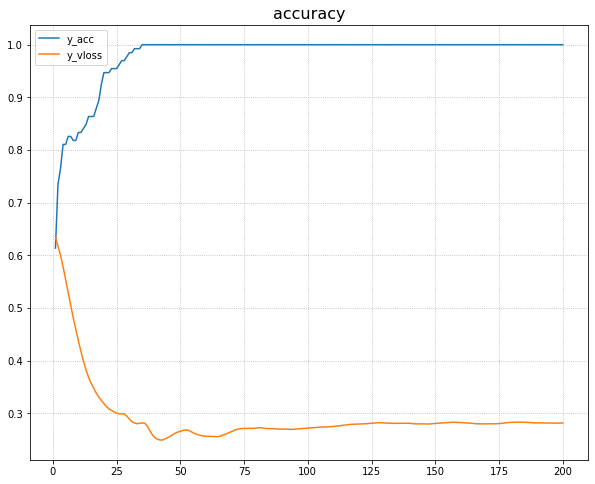

In [61]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize = (10, 8))
plt.plot(xs, y_acc, label = 'y_acc')
plt.plot(xs, y_vloss, label = 'y_vloss')
plt.title('accuracy', fontsize = 16)

plt.grid(linestyle = ':')
plt.legend()
plt.show()

### 베스트 모델 찾고 조기종료 하는 콜백함수

In [75]:
model = Sequential([
    Dense(80, input_dim = 60, activation = 'relu'),
    Dense(48, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [76]:
model.compile('adam', 'binary_crossentropy',['accuracy'])

### 베스트 모델만 저장하는 콜백함수

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint('sonar_best.h5', monitor = 'val_loss', 
                     verbose = 1, save_best_only = True)

es = EarlyStopping(patience = 20)

In [78]:
hist = model.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 200, batch_size = 100, verbose = 0,
                   callbacks = [mc, es])


Epoch 1: val_loss improved from inf to 0.68028, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.68028 to 0.66931, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.66931 to 0.65862, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.65862 to 0.64889, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.64889 to 0.63847, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.63847 to 0.62804, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.62804 to 0.61722, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.61722 to 0.60596, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.60596 to 0.59413, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.59413 to 0.58124, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.58124 to 0.56727, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.56727 to 0.55026, saving model to sonar_best.h5

Epoc

- Epoch 32: val_loss improved from 0.28386 to 0.28150, saving model to sonar_best.h5

- Epoch 33: val_loss improved from 0.28150 to 0.28022, saving model to sonar_best.h5

- Epoch 34: val_loss did not improve from 0.28022

In [79]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.7619


[0.4287773668766022, 0.761904776096344]

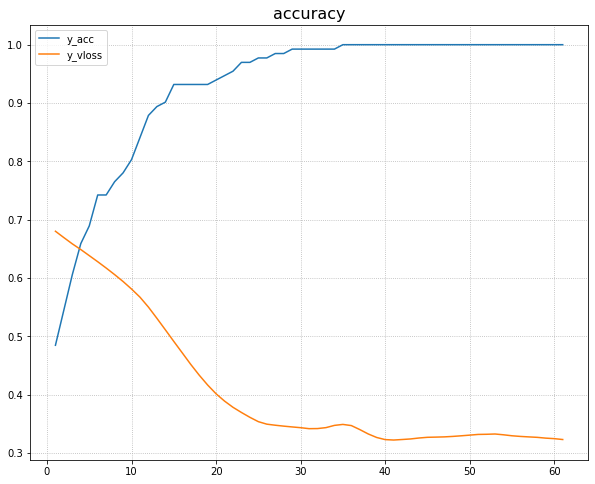

In [80]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize = (10, 8))
plt.plot(xs, y_acc, label = 'y_acc')
plt.plot(xs, y_vloss, label = 'y_vloss')
plt.title('accuracy', fontsize = 16)

plt.grid(linestyle = ':')
plt.legend()
plt.show()